In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


Receitas      0
TV            0
Desconto      0
Patrocinio    0
dtype: int64
   Receitas  TV  Desconto  Patrocinio
0       4.1  17         4           6
1       3.9  14         4           6
2       5.0  20         4           8
3       4.8  18         4           7
4       4.7  16         3           7
            Receitas    TV  Desconto  Patrocinio
Receitas        1.00  0.65     -0.39        0.78
TV              0.65  1.00      0.06        0.34
Desconto       -0.39  0.06      1.00       -0.46
Patrocinio      0.78  0.34     -0.46        1.00
       Receitas     TV  Desconto  Patrocinio
count     24.00  24.00     24.00       24.00
mean       4.82  16.79      3.04        8.00
std        0.43   1.28      0.69        1.10
min        3.90  14.00      2.00        6.00
25%        4.60  16.00      3.00        7.75
50%        4.80  17.00      3.00        8.00
75%        5.12  17.00      3.25        9.00
max        5.50  20.00      4.00       10.00


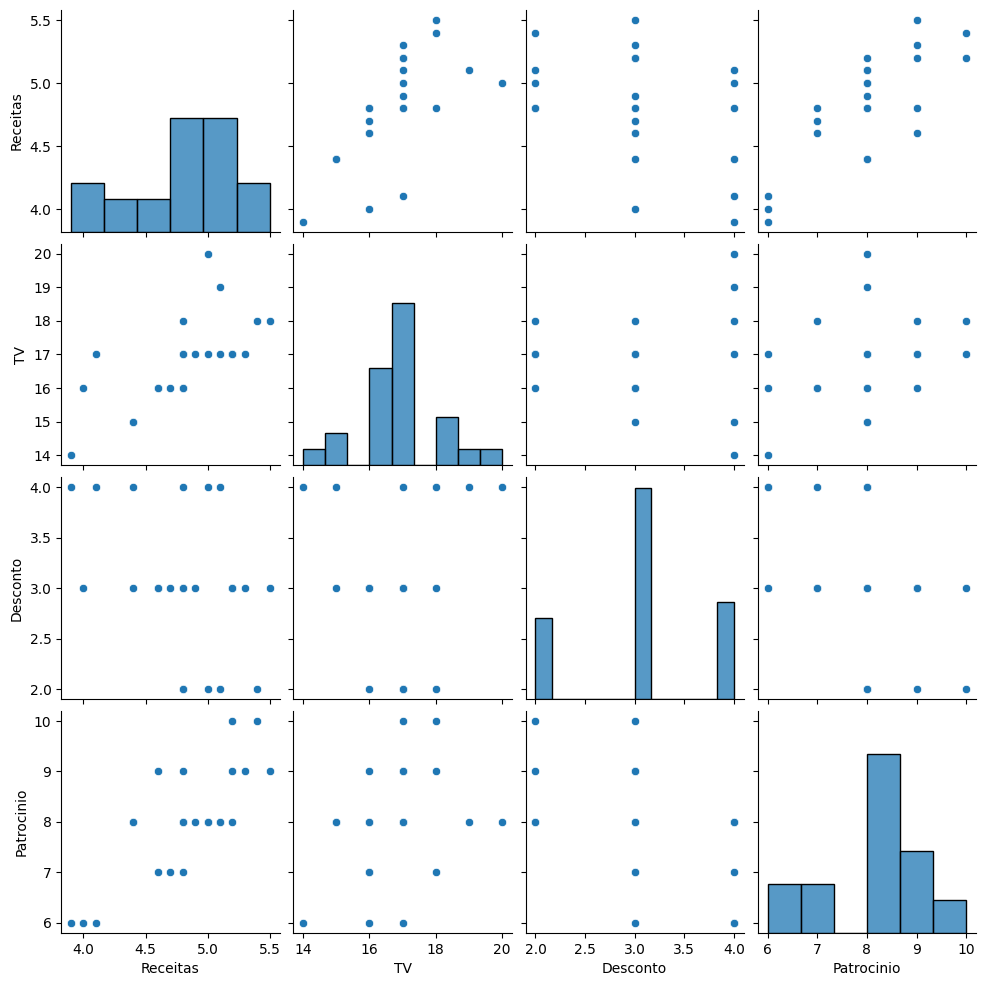

In [53]:
cerveja = pd.read_csv("Cervejas.txt", sep=",")

cerveja.shape   # Dimensao da base de dados
print(cerveja.isna().sum())     # Valores faltantes na base de dados
print(cerveja.head())    # Ultimas observacoes
#print(cerveja.dtypes)  # Tipos de variaveis
print(cerveja.corr().round(2)) # Correlacao entre as variaveil
print(cerveja.describe().round(2)) # Descricao das variaveis

sns.pairplot(cerveja) # 🔹 3️⃣ Matriz de Dispersão (Pairplot)
plt.show()

Os dados do projecto estao estruturados em quatro variaveis de vinte quatro observacoes, sendo uma das variaveis considerada resposta e as outras consideradas explicativas.

Segundo sumario estatistico, pode se afirmar a TV contribui mais nas receitas das cervejas de Moz, do que as outras formas de arrecadar receitas.

Coeficientes (b1, b2, b3): [ 0.16193238 -0.06840726  0.18975651]
Intercepto (b0): 0.78


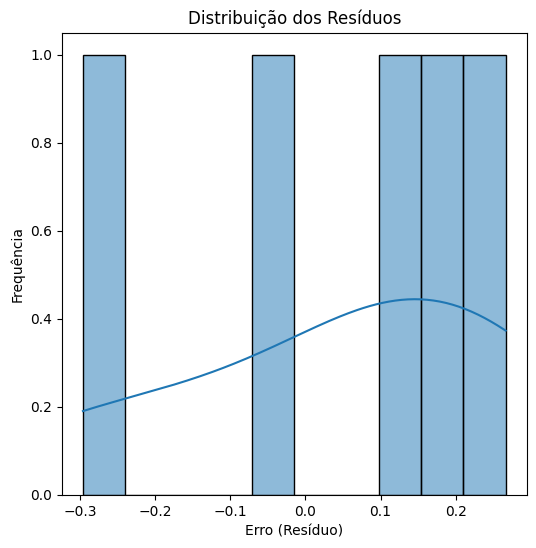

In [43]:
# Dividindo os dados em features (X) e alvo (y)

X = cerveja.drop(columns=["Receitas"])
y = cerveja["Receitas"]
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressao simples
modelo_r = LinearRegression()
modelo_r.fit(X_train, y_train)

# Fazendo previsões
y_pred_r = modelo_r.predict(X_test)

# Mostrando a equação da reta
print(f"Coeficientes (b1, b2, b3): {modelo_r.coef_}")
print(f"Intercepto (b0): {modelo_r.intercept_:.2f}")

# 🔹 2️⃣ Gráfico de Resíduos
residuos = y_test - y_pred_r
plt.figure(figsize=(6, 6))
sns.histplot(residuos, kde=True, bins=10)
plt.xlabel("Erro (Resíduo)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Resíduos")
plt.show()



In [44]:
# Criando o modelo de Árvore de Decisão para Regressão
modelo = DecisionTreeRegressor(random_state=42)
# Treinando o modelo

modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)


Erro Absoluto Médio (MAE): 0.21
Erro Quadrático Médio (RMSE): 0.33


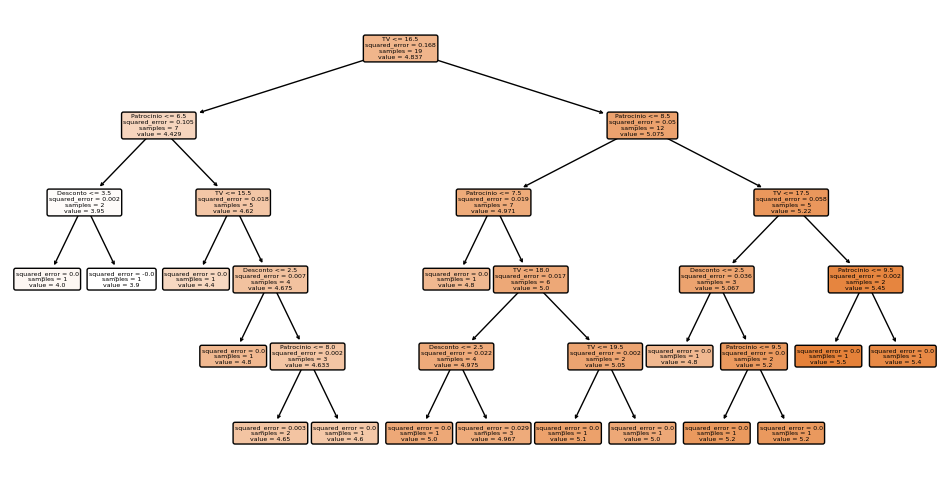

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, mean_squared_error
from sklearn import metrics

# Criando o modelo de Árvore de Decisão para Regressão
modelo = DecisionTreeRegressor(random_state=42)
# Treinando o modelo
modelo.fit(X_train, y_train)
# Fazendo previsões
y_pred = modelo.predict(X_test)

# 🔹 Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (RMSE): {rmse:.2f}")

# 8. Visualizar a Árvore de Decisão
plt.figure(figsize=(12, 6))
tree.plot_tree(modelo, feature_names=X.columns, filled=True, rounded=True)
plt.show()

from sklearn.metrics import accuracy_score

# Calcular acurácia
#acuracia = metrics.accuracy_score(y_test, y_pred)
#print(f"Acurácia do modelo: {round(acuracia * 100, 2)}%")   
#print(f'Accuracy: ',metrics.accuracy_score(y_test, y_pred))
#print('CL Report:',metrics.classification_report(y_test, y_pred, zero_division=1))